<a href="https://colab.research.google.com/github/jcmachicao/MachineLearningAvanzado_UC_2025/blob/main/U4__XAI_captum_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Captum Simple Demo
Create a simple demonstration of Captum for a basic neural network using random data. The demonstration should include model definition, data generation, Captum explanation, and visualization of the results. Modify the empty cell with id "IOSifgeAQ8y7" to include the necessary code.

## Setup

### Subtask:
Install necessary libraries.


**Reasoning**:
The subtask requires installing the necessary libraries using pip.



In [1]:
%pip install torch torchvision captum

## Model definition

### Subtask:
Define a simple neural network.


**Reasoning**:
Define a simple neural network as instructed.



In [2]:
import torch.nn as nn

class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

## Data generation

### Subtask:
Create random data for input and target.


**Reasoning**:
Import torch and generate random input and target data as tensors with specified dimensions.



In [3]:
import torch

num_samples = 100
input_size = 10
output_size = 1

input_data = torch.randn(num_samples, input_size)
target_data = torch.randn(num_samples, output_size)

## Captum explanation

### Subtask:
Apply a Captum explanation method to the model and data.


**Reasoning**:
Apply a Captum explanation method to the model and data by instantiating the model, creating an Integrated Gradients explainer, and calculating attributions.



In [4]:
from captum.attr import IntegratedGradients

hidden_size = 5
model = SimpleNN(input_size, hidden_size, output_size)

ig = IntegratedGradients(model)

# The target should be the class index, which is 0 for a single output neuron
target_indices = torch.zeros(num_samples, dtype=torch.long)

attributions = ig.attribute(input_data, target=target_indices)

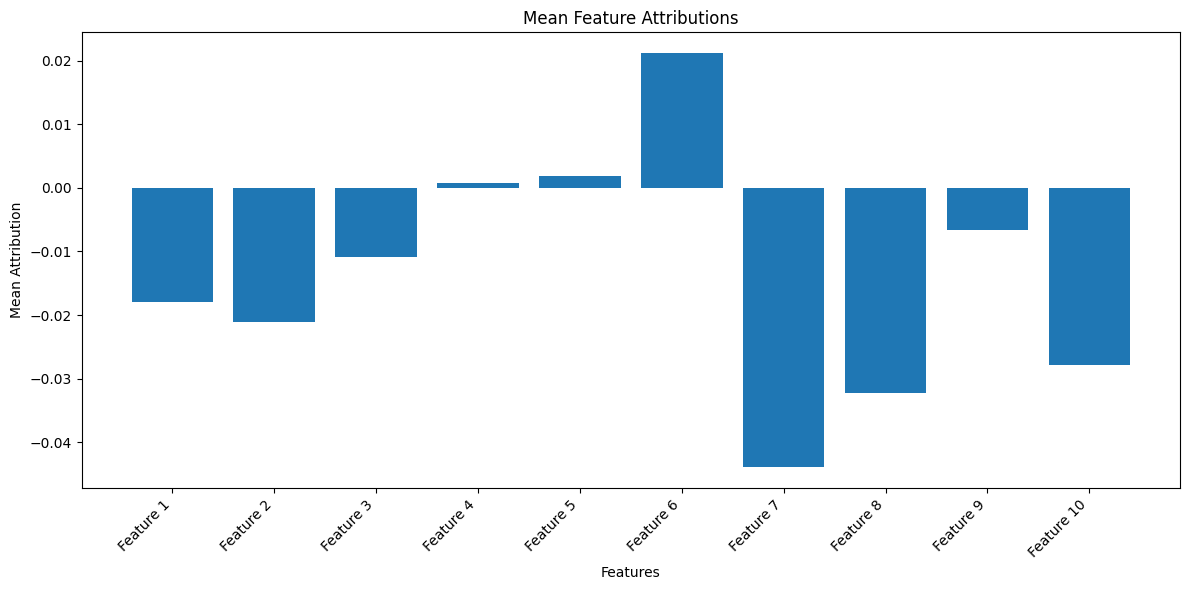

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Visualize the attributions
# Average the attributions across all samples
mean_attributions = attributions.mean(dim=0).squeeze().detach().numpy()

# Create a bar plot
feature_names = [f'Feature {i+1}' for i in range(input_size)]
plt.figure(figsize=(12, 6))
plt.bar(feature_names, mean_attributions)
plt.xlabel('Features')
plt.ylabel('Mean Attribution')
plt.title('Mean Feature Attributions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Visualization

### Subtask:
Visualize the results of the Captum explanation.


**Reasoning**:
Visualize the results of the Captum explanation by calculating the mean attributions, creating feature names, generating a bar plot, setting labels and title, rotating x-axis labels, adjusting layout, and displaying the plot.



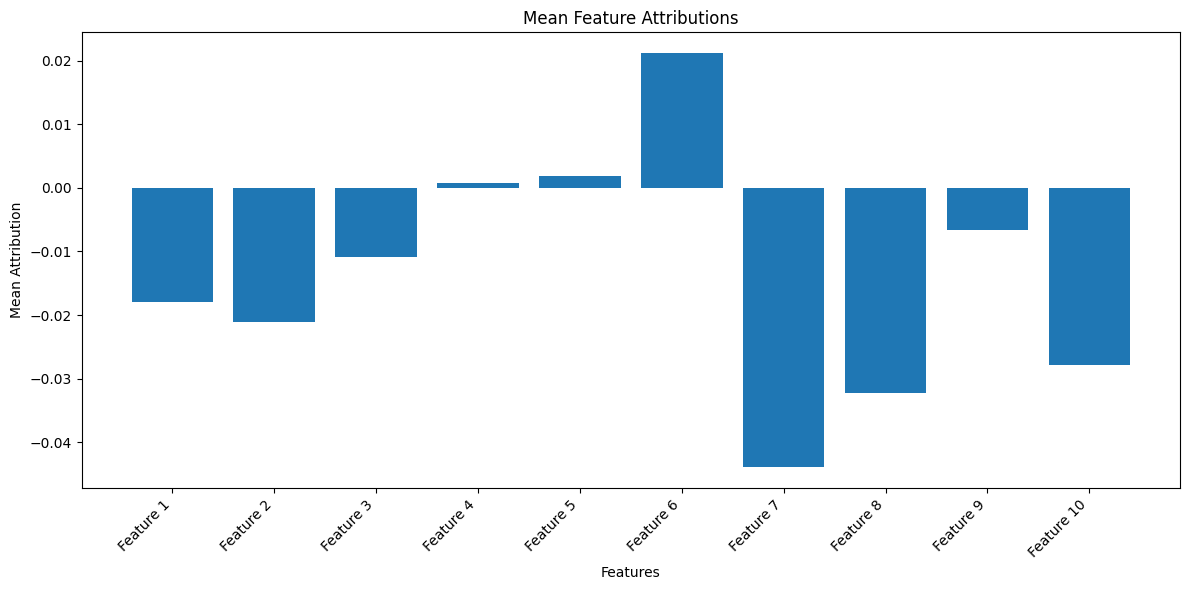

In [6]:
import matplotlib.pyplot as plt
import numpy as np

mean_attributions = attributions.mean(dim=0).squeeze().detach().numpy()

feature_names = [f'Feature {i+1}' for i in range(input_size)]
plt.figure(figsize=(12, 6))
plt.bar(feature_names, mean_attributions)
plt.xlabel('Features')
plt.ylabel('Mean Attribution')
plt.title('Mean Feature Attributions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

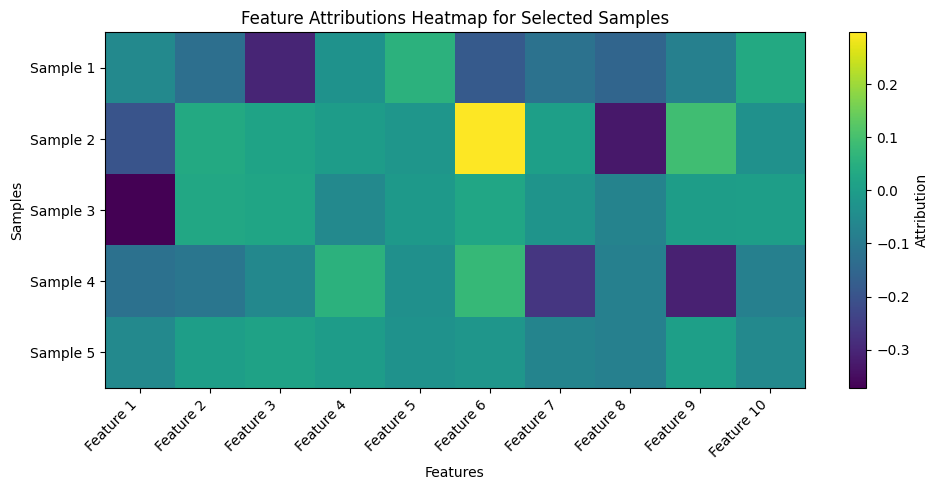

In [7]:
# Select a few samples to visualize
num_samples_to_visualize = 5
selected_samples = attributions[:num_samples_to_visualize, :].squeeze().detach().numpy()

# Create a heatmap
plt.figure(figsize=(10, num_samples_to_visualize))
plt.imshow(selected_samples, cmap='viridis', aspect='auto')
plt.colorbar(label='Attribution')
plt.yticks(range(num_samples_to_visualize), [f'Sample {i+1}' for i in range(num_samples_to_visualize)])
plt.xticks(range(input_size), feature_names, rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Samples')
plt.title('Feature Attributions Heatmap for Selected Samples')
plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   A simple neural network with one hidden layer and a ReLU activation function was defined.
*   Random input and target data were generated for demonstration purposes.
*   The Integrated Gradients method from the Captum library was successfully applied to the model and data to calculate feature attributions.
*   Correctly providing the target as a tensor of class indices (zeros in this case for a single output neuron) was crucial for the attribution calculation.
*   The mean feature attributions were visualized using a bar plot, showing the average importance of each input feature across all samples according to the Integrated Gradients method.

### Insights or Next Steps

*   The visualization provides a high-level understanding of feature importance but doesn't show the contribution of individual features for specific samples.
*   Explore other Captum attribution methods (e.g., LRP, DeepLift) and visualization techniques (e.g., heatmaps for individual samples) to gain more detailed insights into the model's predictions.
